In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyspark py4j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=0a576176fd9290113eefb74214be83b5d147d1f9d30a21c8aa3fd017b87f08f6
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

# Khởi tạo SparkSession
spark = SparkSession.builder.appName("PhanTichDiemDaiHoc").getOrCreate()

In [ ]:
# Đọc tệp CSV từ Google Drive
df_spark = spark.read.csv("/content/drive/MyDrive/Datatrain/College entrance exam scores/diem_thi_thpt_2024.csv", header=True, inferSchema=True)

# Hiển thị thông tin về schema và các dòng dữ liệu đầu tiên
df_spark.show(5)

+-------+----+-------+---------+------+-------+--------+-------+------+----+------------+
|    sbd|toan|ngu_van|ngoai_ngu|vat_li|hoa_hoc|sinh_hoc|lich_su|dia_li|gdcd|ma_ngoai_ngu|
+-------+----+-------+---------+------+-------+--------+-------+------+----+------------+
|1000001| 8.4|   6.75|      8.0|   6.0|   5.25|     5.0|   NULL|  NULL|NULL|          N1|
|1000002| 8.6|    8.5|      7.2|  NULL|   NULL|    NULL|   7.25|   6.0| 8.0|          N1|
|1000003| 8.2|   8.75|      8.2|  NULL|   NULL|    NULL|   7.25|  7.25|8.75|          N1|
|1000004| 4.8|    8.5|      7.4|  NULL|   NULL|    NULL|    7.0|   6.0| 7.5|          N1|
|1000005| 8.6|    9.0|      7.8|  NULL|   NULL|    NULL|    9.0|  8.75| 8.5|          N1|
+-------+----+-------+---------+------+-------+--------+-------+------+----+------------+
only showing top 5 rows



In [ ]:
# Tính toán thống kê cơ bản
df_spark.describe().show()

+-------+--------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------+
|summary|                 sbd|             toan|           ngu_van|         ngoai_ngu|           vat_li|           hoa_hoc|          sinh_hoc|           lich_su|            dia_li|              gdcd|ma_ngoai_ngu|
+-------+--------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------+
|  count|             1061605|          1045613|           1050101|            912705|           345615|            346518|            342378|            706214|            704682|            583609|      912705|
|   mean|2.7343535325159546E7|6.447309281732341| 7.231146118325777| 5.521937975578041|6.666866310779335| 6.680829711587854|6.2840785622908015| 6.570

In [ ]:
subjects = ["toan", "ngu_van", "ngoai_ngu", "vat_li", "hoa_hoc",
                      "sinh_hoc", "lich_su", "dia_li", "gdcd"]

subject_names = ["Toán", "Ngữ Văn", "Ngoại Ngữ", "Vật Lý", "Hóa Học",
            "Sinh Học", "Lịch Sử", "Địa lý", "GDCD"]

In [ ]:
def get_score_distribution(df_spark, subject):
    # Nhóm và đếm số lượng sinh viên theo điểm số của môn học
    return df_spark.groupBy(subject).count().orderBy(subject)

# Lấy phân phối điểm cho môn Toán
toan_distribution = get_score_distribution(df_spark, subjects[0])
print(toan_distribution_pandas)

    toan  count
0    NaN  15992
1    0.0      1
2    0.4      1
3    0.6      5
4    0.8     12
5    1.0     43
6    1.2    126
7    1.4    278
8    1.6    619
9    1.8   1156
10   2.0   1975
11   2.2   2935
12   2.4   4279
13   2.6   5681
14   2.8   7304
15   3.0   8593
16   3.2  10076
17   3.4  11770
18   3.6  13026
19   3.8  14851
20   4.0  16457
21   4.2  17680
22   4.4  19896
23   4.6  21858
24   4.8  24293
25   5.0  26556
26   5.2  28625
27   5.4  31311
28   5.6  34540
29   5.8  37438
30   6.0  40255
31   6.2  43553
32   6.4  46501
33   6.6  49309
34   6.8  51589
35   7.0  53000
36   7.2  54349
37   7.4  55273
38   7.6  56017
39   7.8  55990
40   8.0  54182
41   8.2  48784
42   8.4  39796
43   8.6  27884
44   8.8  16048
45   9.0   7573
46   9.2   2899
47   9.4    962
48   9.6    221
49   9.8     43


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_pandas = df_spark.select("toan", "ngu_van", "ngoai_ngu", "vat_li", "hoa_hoc",
                      "sinh_hoc", "lich_su", "dia_li", "gdcd", "ma_ngoai_ngu").toPandas()

In [ ]:
def plot_histogram_with_numbers(subject, subject_name):
    # Tính tần suất của các điểm số
    toan_scores = df_pandas[subject]
    counts, bins = np.histogram(toan_scores, bins=np.arange(0, 11.1, 1))

    # Tạo biểu đồ cột
    plt.figure(figsize=(8, 6))
    plt.bar(bins[:-1], counts, width=0.8)

    # Hiển thị giá trị trên đỉnh từng cột
    for i in range(len(counts)):
        plt.text(bins[i], counts[i] + 0.1, str(counts[i]), ha='center', fontsize=12)

    # Thêm tiêu đề và nhãn cho các trục
    plt.title(f"Phổ điểm môn {subject_name}", fontsize=15)
    plt.xlabel("Điểm", fontsize=12)
    plt.ylabel("Số lượng sinh viên", fontsize=12)

    # Hiển thị biểu đồ
    plt.xticks(np.arange(0, 11, 1))  # Hiển thị các nhãn trên trục X là các điểm từ 0 đến 10
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Thêm lưới ngang để dễ quan sát

    plt.show()

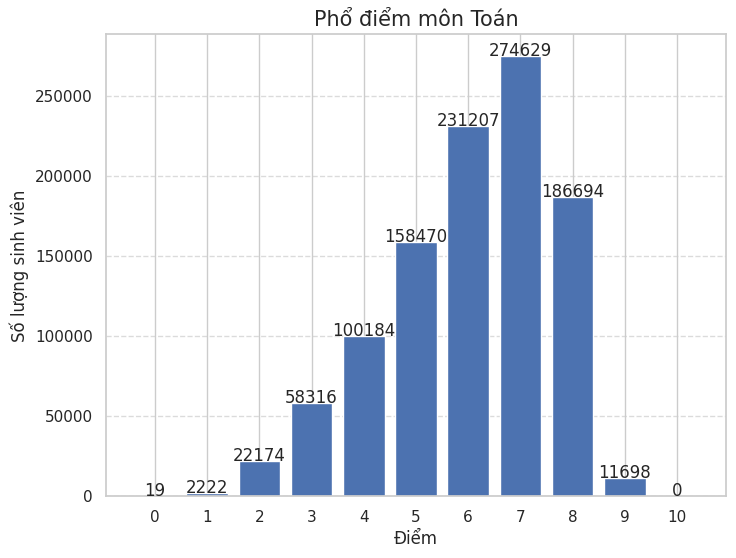

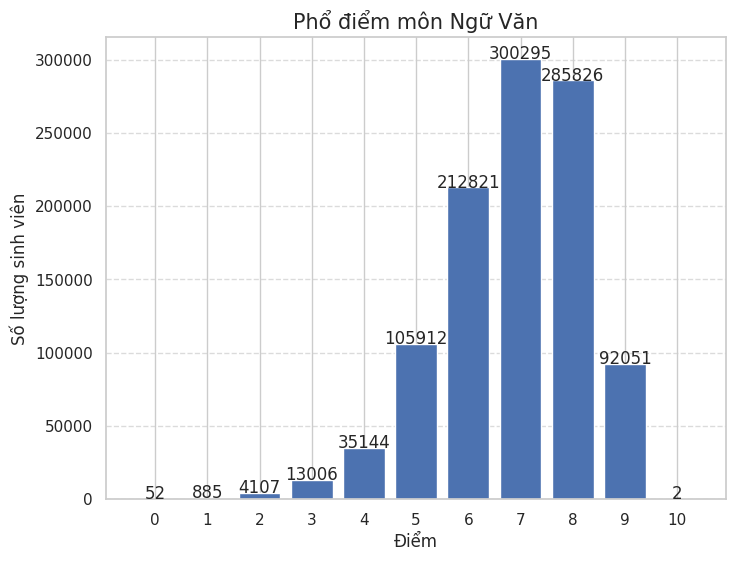

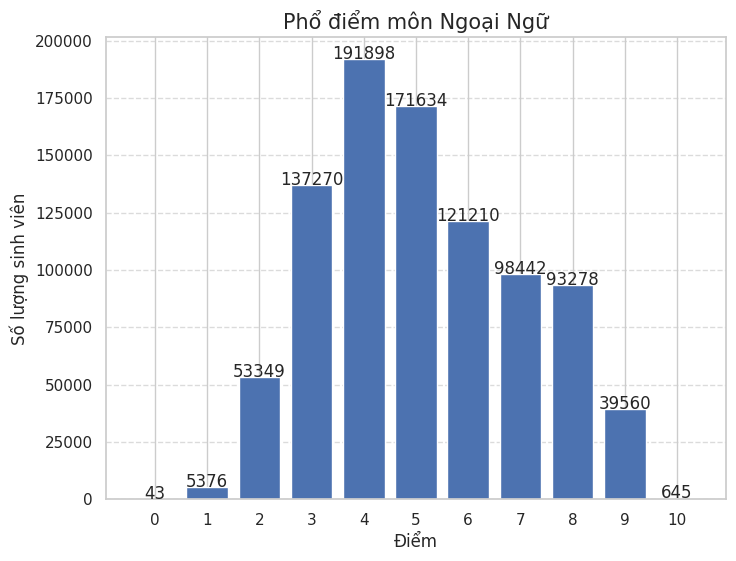

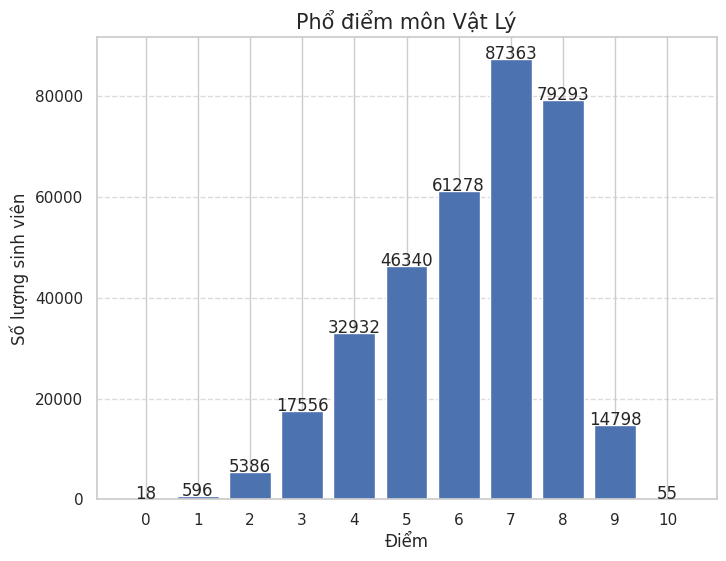

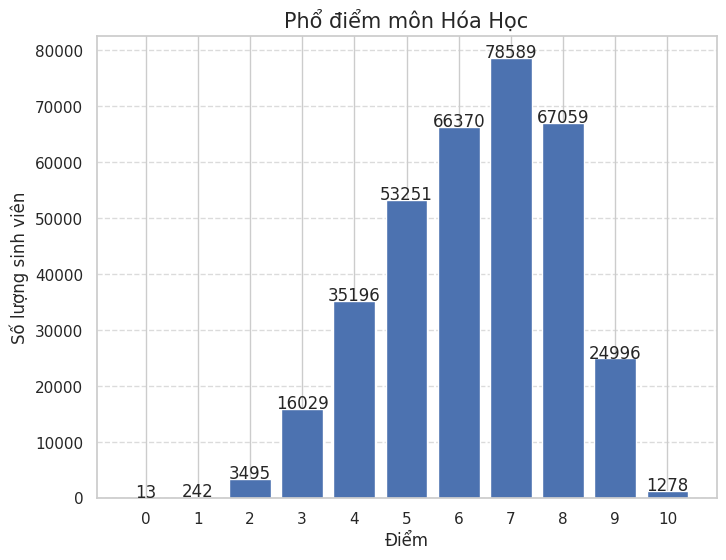

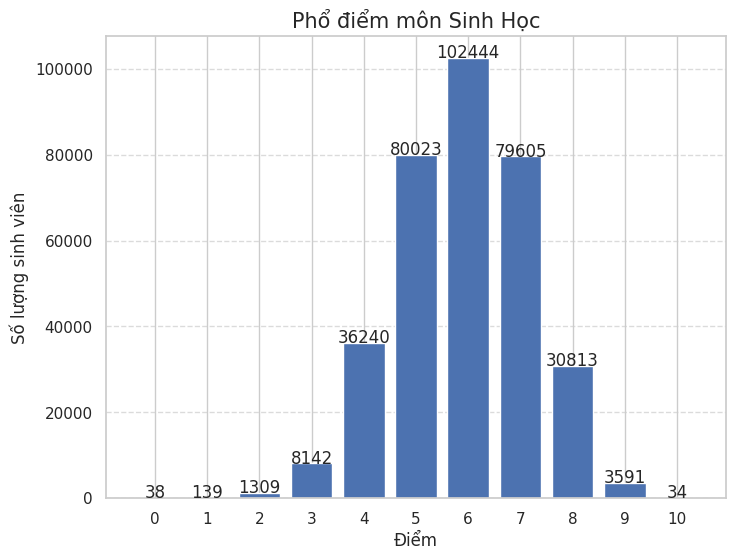

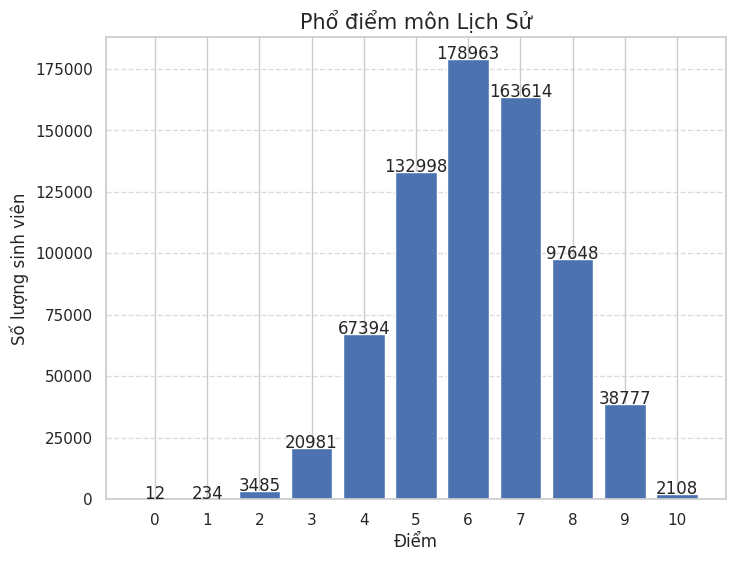

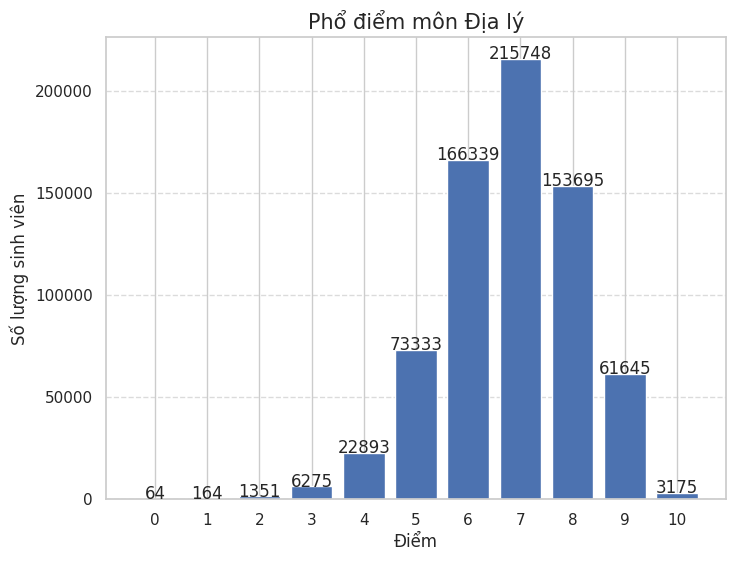

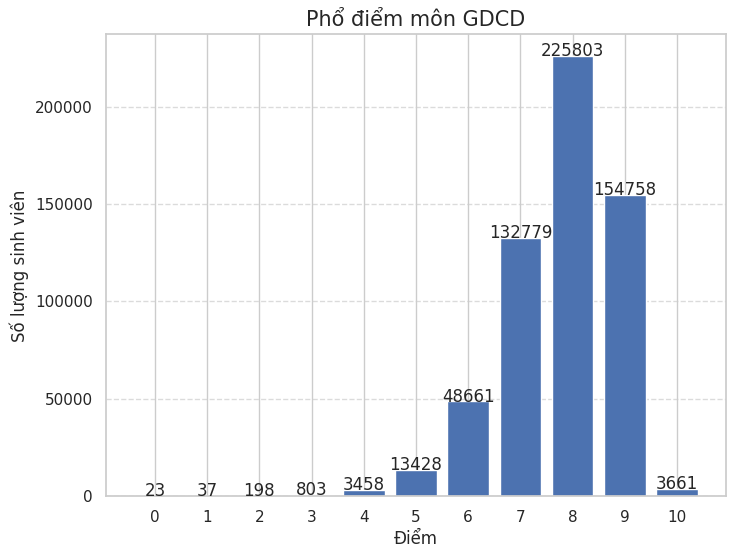

In [ ]:
for subject, subject_name in zip(subjects, subject_names):
    plot_histogram_with_numbers(subject, subject_name)

In [ ]:
from pyspark.sql import functions as F

# Tạo các cột để tính số môn thi khối Tự nhiên và Xã hội
# Các môn tự nhiên: Sinh Học, Vật Lý, Hóa Học (thứ tự: subjects[3], subjects[4], subjects[5])
# Các môn xã hội: Lịch Sử, Địa lý, GDCD (thứ tự: subjects[6], subjects[7], subjects[8])

df_spark = df_spark.withColumn("tu_nhien",
    (F.col(subjects[3]).isNotNull().cast("int") + F.col(subjects[4]).isNotNull().cast("int") + F.col(subjects[5]).isNotNull().cast("int"))
)

df_spark = df_spark.withColumn("xa_hoi",
    (F.col(subjects[6]).isNotNull().cast("int") + F.col(subjects[7]).isNotNull().cast("int") + F.col(subjects[8]).isNotNull().cast("int"))
)


In [ ]:
# Phân loại theo khối: Nếu số môn tự nhiên >= xã hội, học sinh thuộc khối Tự nhiên, ngược lại là Xã hội
df_spark = df_spark.withColumn("khoi",
    F.when(F.col("tu_nhien") >= F.col("xa_hoi"), "Tự nhiên").otherwise("Xã hội")
)

# Hiển thị cột mới "Khối"
df_spark.select("khoi").show(5)


+--------+
|    khoi|
+--------+
|Tự nhiên|
|  Xã hội|
|  Xã hội|
|  Xã hội|
|  Xã hội|
+--------+
only showing top 5 rows



In [ ]:
# Đếm số lượng học sinh theo khối
khối_count = df_spark.groupBy("khoi").count()

# Tính tổng số học sinh
total_students = df_spark.count()

# Tính phần trăm cho từng khối
khối_count = khối_count.withColumn("Phần trăm", (F.col("count") / total_students) * 100)

# Hiển thị kết quả
khối_count.show()

+--------+------+-----------------+
|    khoi| count|        Phần trăm|
+--------+------+-----------------+
|Tự nhiên|354723|33.41384036435397|
|  Xã hội|706882|66.58615963564603|
+--------+------+-----------------+



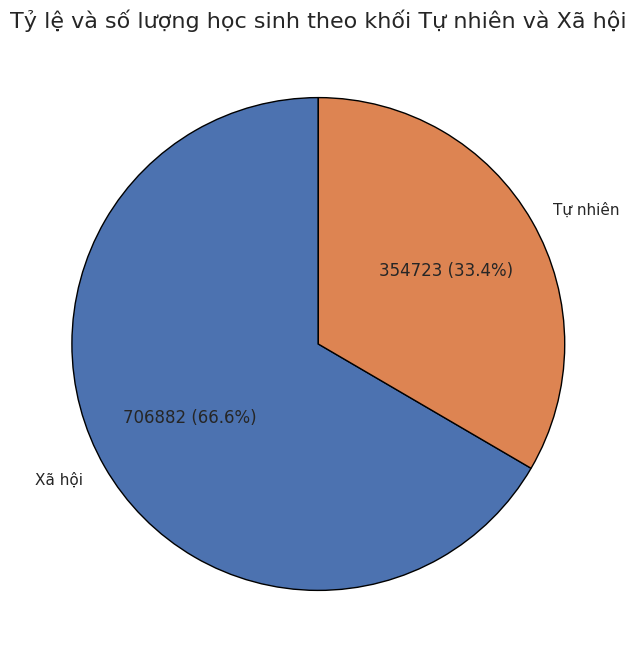

In [ ]:
# Tạo điều kiện để kiểm tra học sinh có tham gia môn của từng khối
df_pandas['Tự nhiên'] = df_pandas[[subjects[3], subjects[4], subjects[5]]].notnull().sum(axis=1)
df_pandas['Xã hội'] = df_pandas[[subjects[6], subjects[7], subjects[8]]].notnull().sum(axis=1)

# Phân loại học sinh theo khối có số môn học nhiều hơn
df_pandas['Khối'] = np.where(df_pandas['Tự nhiên'] >= df_pandas['Xã hội'], 'Tự nhiên', 'Xã hội')

# Đếm số lượng học sinh theo khối Tự nhiên và Xã hội
counts = df_pandas['Khối'].value_counts()

# Hàm tùy chỉnh để hiển thị cả số lượng và phần trăm
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{absolute} ({pct:.1f}%)"

# Tạo biểu đồ tròn
plt.figure(figsize=(8, 8))

# Vẽ biểu đồ tròn với nhãn, số lượng và phần trăm
plt.pie(counts.values, labels=counts.index, autopct=lambda pct: func(pct, counts.values),
         startangle=90, wedgeprops={'edgecolor': 'black'})

# Thêm tiêu đề
plt.title("Tỷ lệ và số lượng học sinh theo khối Tự nhiên và Xã hội", fontsize=16)

# Hiển thị biểu đồ
plt.show()